<a href="https://colab.research.google.com/github/Ronit1225/Google-app-Final-Project/blob/main/Google_app_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **App Rating Prediction**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# imports the drive from the google.colab library.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Load the data file using pandas.**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/googleplaystore.csv'

In [ ]:
df = pd.read_csv(file_path)
print("Display Data Frame Head:\n",df.head(),"\n","\n") # Print the first 5 rows of your DataFrame
print("Display summary statistics of the numeric columns:\n",df.describe(),"\n","\n") # Display summary statistics
print("Display Data Frame Info:")
print(df.info()) # Display basic information about the dataset

Display Data Frame Head:
                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design    07-Jan-18               1.0.

# **Data Cleaning**

**2. Check for null values in the data. Get the number of null values for each column.**

In [ ]:
# Check for null values and get the number of null values for each column
Null_values = df.isnull().sum()
# Display the results
print("Number of null values for each column:\n",Null_values)

Number of null values for each column:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


**3. Drop records with nulls in any of the columns.**

In [ ]:
df.dropna(inplace=True) # Drop rows with any missing values
# Handling Missing Values: Use the dropna method to remove rows with any missing values.
# The inplace=True parameter modifies the original dataset rather than creating a new one.
print("Data Frame Info:")
print(df.info())

Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB
None


In [ ]:
duplicates_indices = df[df.duplicated()].groupby(df.columns.tolist()).apply(lambda x: x.index.tolist()).tolist()
print("Indices of duplicate rows:", duplicates_indices)

Indices of duplicate rows: [[1407], [2543], [2385], [1434], [7035], [1324], [2402], [946, 977], [10768], [3806], [2378], [280], [279], [2488], [588, 681], [10049], [2505], [3188], [2400], [396], [2517], [5958], [8630], [1504], [1511], [277], [2202], [3780, 3800], [677], [547], [951, 983], [6593], [833], [2211], [2627, 2647], [2537], [6911], [2957], [2199], [667], [3012], [3061, 3080], [561], [2389], [1778], [1968], [6585], [6595], [6594], [6590], [3211], [1922], [236, 265], [794], [7628], [3818], [936], [3007, 3015, 3020], [3064, 3090], [3047], [543], [3792, 3811], [7885], [430], [1417], [1413], [1404], [1421], [1406], [2899, 2925], [1751], [1966], [671], [2409], [2750], [548], [672], [2725, 2739], [1630], [560], [1704], [550], [8658], [982], [2652], [786], [935, 961], [276], [962], [2904], [2132], [1935], [1346, 1445], [2401], [1142], [2135], [2220], [8639], [292], [1242], [2205], [2201], [799, 826], [2387], [2395], [3965], [3010, 3018], [3060, 3072], [3013], [4095], [549], [2195, 703

In [ ]:
df.drop_duplicates(inplace=True) # Remove Duplicates
print("Is Null=\n",Null_values)
# Check for null values after removing them
null_values_after_removal = df.isnull().sum()

# Display the results
print("\nNumber of null values for each column after removing:\n",null_values_after_removal)
print("\nDisplay Data Frame Info:")
print(df.info())

Is Null=
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Number of null values for each column after removing:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null 

**4. Variables seem to have incorrect type and inconsistent formatting. Need to fix them:**

In [ ]:
df['Rating'] = df['Rating'].astype(str)

df['Type'] = df['Type'].astype(str)

print("\nDisplay Data Frame Info:") # Rating and Type showing object because of the 'Varies with device' still present in them.
print(df.info())


Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             8886 non-null   object
 1   Category        8886 non-null   object
 2   Rating          8886 non-null   object
 3   Reviews         8886 non-null   object
 4   Size            8886 non-null   object
 5   Installs        8886 non-null   object
 6   Type            8886 non-null   object
 7   Price           8886 non-null   object
 8   Content Rating  8886 non-null   object
 9   Genres          8886 non-null   object
 10  Last Updated    8886 non-null   object
 11  Current Ver     8886 non-null   object
 12  Android Ver     8886 non-null   object
dtypes: object(13)
memory usage: 971.9+ KB
None


**a. Size column has sizes in Kb as well as Mb. To analyze, we need to convert these to numeric**
- Extract the numeric value from the column
- Multiply the value by 1,000, if size is mentioned in Mb

In [ ]:
def convert_Size(Size):

    if isinstance(Size, str) and 'M' in Size:
        return float(Size.replace('M', ''))*1000
    elif isinstance(Size, str) and 'k' in Size:
        return float(Size.replace('k', ''))
    else:
        return Size

df['Size'] = df['Size'].apply(convert_Size)

**b. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).**

In [ ]:
# Converting 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

**c. Installs and price field is currently stored as Float changing it to Int.**
- Treat 1,000,000+ as 1,000,000
- remove ‘+’, ‘,’ from the field, convert it to integer

In [ ]:
df['Installs'] = df['Installs'].astype(str)

df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).astype(float) # The reason regex is used here is to clean the 'Installs' column by removing any non-digit characters.



In [ ]:
df['Installs'] = df['Installs'].astype(int)

**d. Price field is a string and has $ symbol, removing sign, and converting it to numeric**

In [ ]:
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace('[$]', '', regex=True).astype(float)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df.to_csv('GoogleProject.csv', index=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   object 
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 971.9+ KB
None


**Removing textual data.**

In [ ]:
# Removing rows that has Varies with device data
value_to_remove = 'Varies with device'

# Initialize a list to store rows to be dropped
rows_to_drop = []

# Loop over rows and check if the value is present in any column
for index, row in df.iterrows():
    if value_to_remove in row.values:
        rows_to_drop.append(index)

# Drop the identified rows
df = df.drop(rows_to_drop)

# Reset the index to make it contiguous
df = df.reset_index(drop=True)

Create a dictionary mapping 'Type' values to index numbers

In [ ]:
type_mapping = {'Free': 0, 'Paid': 1}

# Replace 'Type' column with index numbers using the dictionary
df['Type'] = df['Type'].replace(type_mapping)

In [ ]:
df.to_csv('GoogleProject.csv', index=False)
print("\nDisplay Data Frame Info:")
print(df.info())


Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7337 non-null   object 
 1   Category        7337 non-null   object 
 2   Rating          7337 non-null   object 
 3   Reviews         7337 non-null   int64  
 4   Size            7337 non-null   object 
 5   Installs        7337 non-null   int64  
 6   Type            7337 non-null   int64  
 7   Price           7337 non-null   float64
 8   Content Rating  7337 non-null   object 
 9   Genres          7337 non-null   object 
 10  Last Updated    7337 non-null   object 
 11  Current Ver     7337 non-null   object 
 12  Android Ver     7337 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 745.3+ KB
None


**5. Sanity checks:**
- Average rating should be between 1 and 5 as only these values are allowed on the play store. Droping the rows that have a value outside this range.
- Reviews shouldnt exceeed installs.
- Price of a free application shouldn't exceed 0.

In [ ]:
# Convert 'Rating' column to numeric, handling errors with coerce to replace non-numeric values with NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with ratings outside the range [1, 5]
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

In [ ]:
# Convert 'Reviews' and 'Installs' columns to numeric (in case they are not already)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows where reviews are more than installs
df = df[df['Reviews'] <= df['Installs']]

In [ ]:
# For free apps, drop rows where the price is greater than 0
df = df[~((df['Type'] == 0) & (df['Price'] > 0))]

df.to_csv('GoogleProject.csv', index=False)

In [ ]:
# Droping rows with ratings outside the range [1, 5]
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

# Droping rows where reviews are more than installs
df = df[df['Reviews'] <= df['Installs']]

# Sanity check For free apps, droping rows where the price is greater than 0
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]

df.to_csv('GoogleProject.csv', index=False)
print("\nDisplay Data Frame Info:")
print(df.info())


Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7331 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7331 non-null   object 
 1   Category        7331 non-null   object 
 2   Rating          7331 non-null   float64
 3   Reviews         7331 non-null   int64  
 4   Size            7331 non-null   object 
 5   Installs        7331 non-null   int64  
 6   Type            7331 non-null   int64  
 7   Price           7331 non-null   float64
 8   Content Rating  7331 non-null   object 
 9   Genres          7331 non-null   object 
 10  Last Updated    7331 non-null   object 
 11  Current Ver     7331 non-null   object 
 12  Android Ver     7331 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 801.8+ KB
None


# **5. Performing Univariate Analysis:**

In [ ]:
pip install seaborn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

**Boxplot for Price**
- Are there any outliers? Think about the price of usual apps on Play Store.

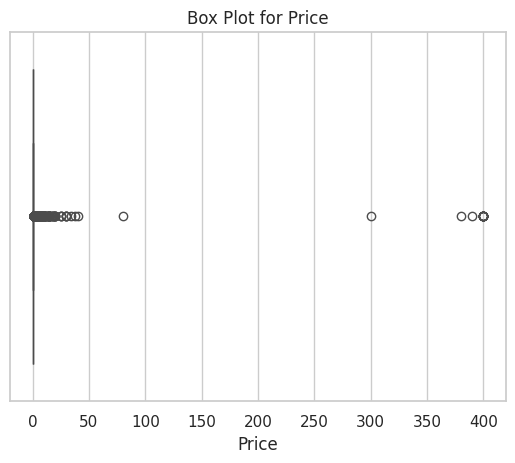

In [ ]:
sns.boxplot(x=df['Price'])
plt.title('Box Plot for Price')
plt.xlabel('Price')
plt.show()

In [ ]:
max_price_app = df.loc[df['Price'].idxmax(), 'App']
max_price_value = df['Price'].max()

print(f"The app with the highest price is: {max_price_app}")
print(f"The price of the app is: {max_price_value}")

The app with the highest price is: I'm Rich - Trump Edition
The price of the app is: 400.0


In [ ]:
# We can see some outliers.

**Boxplot for Review**
- Are there any apps with very high number of reviews?

In [ ]:
max_reviews = df['Reviews'].max()
app_with_max_reviews = df[df['Reviews'] == max_reviews]['App'].values[0]

print(f"The app with the highest number of reviews is '{app_with_max_reviews}' with {max_reviews} reviews.")

The app with the highest number of reviews is 'Clash of Clans' with 44893888 reviews.


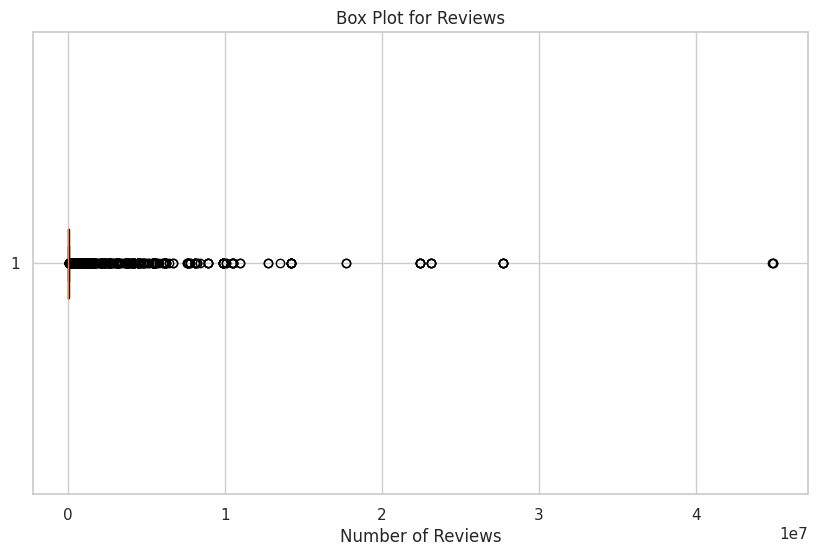

In [ ]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.boxplot(df['Reviews'], vert=False)
plt.title('Box Plot for Reviews')
plt.xlabel('Number of Reviews')
plt.show()

In [ ]:
# Yes their are apps with very high review.

**Histogram for Rate**
- How are the ratings distributed?

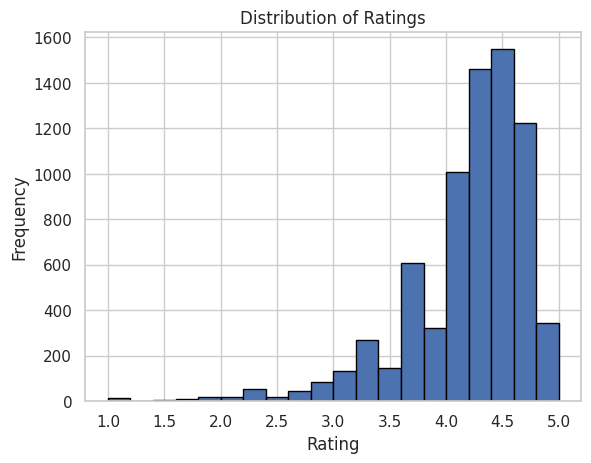

In [ ]:
plt.hist(df['Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Ratings are mostly between 3 to 5.

**Histogram for Size**
- Note down your observations for the plots made above. Which of these seem to have outliers?

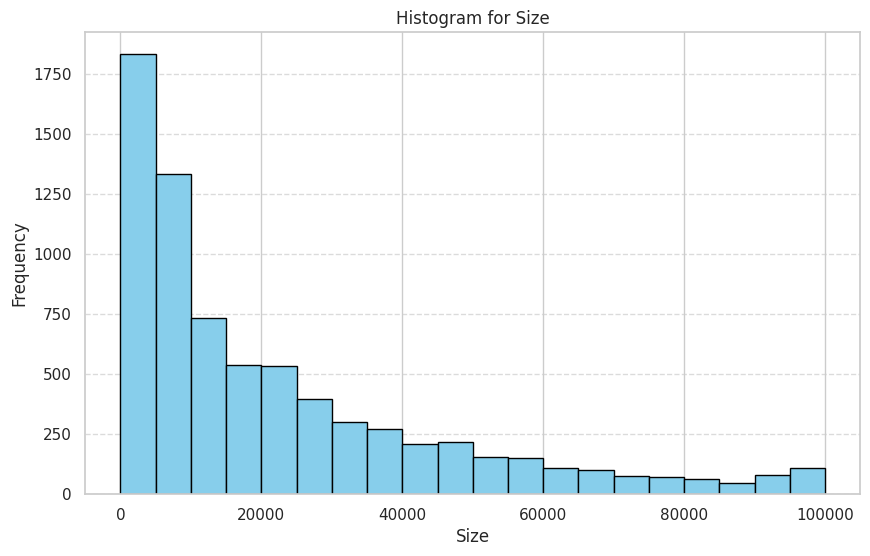

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(df['Size'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram for Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **6. Outlier treatment:**

**Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!**

Check out the records with very high price

In [ ]:
high_price_apps = df[df['Price'] > 200]

# Display the records
print("Apps with a price above $200:")
print(high_price_apps[['App', 'Price']])

Apps with a price above $200:
                                 App   Price
2588          most expensive app (H)  399.99
2716                      💎 I'm rich  399.99
2720        I'm Rich - Trump Edition  400.00
3459                       I am rich  399.99
3462                  I am Rich Plus  399.99
3463                   I am rich VIP  299.99
3464               I Am Rich Premium  399.99
3465             I am extremely Rich  379.99
3466                      I am Rich!  399.99
3467              I am rich(premium)  399.99
3470                   I Am Rich Pro  399.99
3472  I am rich (Most expensive app)  399.99
3474                       I Am Rich  389.99
3477                       I am Rich  399.99
3481              I AM RICH PRO PLUS  399.99


Drop these as most seem to be junk apps

In [ ]:
df.dropna(subset=['Price'], inplace=True)
df = df[df['Price'] <= 200]

df.to_csv('GoogleProject.csv', index=False)
print("\nDisplay Data Frame Info:")
print(df.info())


Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7316 non-null   object 
 1   Category        7316 non-null   object 
 2   Rating          7316 non-null   float64
 3   Reviews         7316 non-null   int64  
 4   Size            7316 non-null   object 
 5   Installs        7316 non-null   int64  
 6   Type            7316 non-null   int64  
 7   Price           7316 non-null   float64
 8   Content Rating  7316 non-null   object 
 9   Genres          7316 non-null   object 
 10  Last Updated    7316 non-null   object 
 11  Current Ver     7316 non-null   object 
 12  Android Ver     7316 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 800.2+ KB
None


**Reviews:**
- Very few apps have very high number of reviews. These are all star apps that donot help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [ ]:
high_reviews_apps = df[df['Reviews'] > 1000000]

# Display the apps with high reviews
print("Apps with high reviews:")
print(high_reviews_apps[['App', 'Reviews']])
print("Reviews Description:\n",df['Reviews'].describe())

Apps with high reviews:
                                              App  Reviews
147        OfficeSuite : Free Office + PDF Editor  1002861
194        OfficeSuite : Free Office + PDF Editor  1002859
230                   Yahoo Mail – Stay Organized  4187998
232                 imo free video calls and chat  4785892
241   UC Browser Mini -Tiny Fast Private & Secure  3648120
...                                           ...      ...
6683                   Voice changer with effects  1260903
6895                             Farm Heroes Saga  7615646
6898                              Fallout Shelter  2721923
7015                             Garena Free Fire  5534114
7211                           FRONTLINE COMMANDO  1351833

[314 rows x 2 columns]
Reviews Description:
 count    7.316000e+03
mean     2.793785e+05
std      1.754921e+06
min      1.000000e+00
25%      9.700000e+01
50%      2.039000e+03
75%      3.572425e+04
max      4.489389e+07
Name: Reviews, dtype: float64


Dropping these outliers.

In [ ]:
df = df[df['Reviews'] <= 1000000]
print("Reviews Description after removing Outliers:\n",df['Reviews'].describe())
df.to_csv('GoogleProject.csv', index=False)
print("\nDisplay Data Frame Info:")
print(df.info())

Reviews Description after removing Outliers:
 count      7002.000000
mean      49530.791488
std      133342.802319
min           1.000000
25%          85.000000
50%        1565.000000
75%       25723.000000
max      990796.000000
Name: Reviews, dtype: float64

Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7002 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7002 non-null   object 
 1   Category        7002 non-null   object 
 2   Rating          7002 non-null   float64
 3   Reviews         7002 non-null   int64  
 4   Size            7002 non-null   object 
 5   Installs        7002 non-null   int64  
 6   Type            7002 non-null   int64  
 7   Price           7002 non-null   float64
 8   Content Rating  7002 non-null   object 
 9   Genres          7002 non-null   object 
 10  Last Updated    7002 non-null   object 
 11  Current Ver     7

**Installs:**  
**- There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.**

In [ ]:
# Find apps with high installs
high_installs_apps = df[df['Installs'] > 100000000]

# Display the apps with high installs
print("Apps with high installs:")
print(high_installs_apps[['App', 'Installs']])
print("Installs Description:\n",df['Installs'].describe())

Apps with high installs:
                 App    Installs
2271     Google News  1000000000
2311     Google News  1000000000
3652  Samsung Health   500000000
6673     Google News  1000000000
Installs Description:
 count    7.002000e+03
mean     2.719903e+06
std      2.258826e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


**- Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99**

In [ ]:
percentiles_to_calculate = [10, 25, 50, 70, 90, 95, 99]

install_percentiles = np.percentile(df['Installs'], percentiles_to_calculate)

for p, value in zip(percentiles_to_calculate, install_percentiles):
    print(f"{p}th Percentile: {value}")
print("\nDisplay Data Frame Info:")
print(df.info())

10th Percentile: 1000.0
25th Percentile: 10000.0
50th Percentile: 100000.0
70th Percentile: 1000000.0
90th Percentile: 10000000.0
95th Percentile: 10000000.0
99th Percentile: 50000000.0

Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7002 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7002 non-null   object 
 1   Category        7002 non-null   object 
 2   Rating          7002 non-null   float64
 3   Reviews         7002 non-null   int64  
 4   Size            7002 non-null   object 
 5   Installs        7002 non-null   int64  
 6   Type            7002 non-null   int64  
 7   Price           7002 non-null   float64
 8   Content Rating  7002 non-null   object 
 9   Genres          7002 non-null   object 
 10  Last Updated    7002 non-null   object 
 11  Current Ver     7002 non-null   object 
 12  Android Ver     7002 non-null   object 
dtypes

**- Decide a threshold as cutoff for outlier and drop records having values more than that**

In [ ]:
df = df[df['Installs'] <= 10000000]
df.to_csv('GoogleProject.csv', index=False)
print("\nDisplay Data Frame Info:")
print(df.info())


Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6921 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6921 non-null   object 
 1   Category        6921 non-null   object 
 2   Rating          6921 non-null   float64
 3   Reviews         6921 non-null   int64  
 4   Size            6921 non-null   object 
 5   Installs        6921 non-null   int64  
 6   Type            6921 non-null   int64  
 7   Price           6921 non-null   float64
 8   Content Rating  6921 non-null   object 
 9   Genres          6921 non-null   object 
 10  Last Updated    6921 non-null   object 
 11  Current Ver     6921 non-null   object 
 12  Android Ver     6921 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 757.0+ KB
None


In [ ]:
print("Installs Description:\n", df['Installs'].describe())

Installs Description:
 count    6.921000e+03
mean     1.595833e+06
std      3.095097e+06
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+07
Name: Installs, dtype: float64


# **7. Bivariate Analysis**
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

**Make scatter plot/joinplot for Rating vs. Price**
- What pattern do you observe? Does rating increase with price?

<Figure size 1000x800 with 0 Axes>

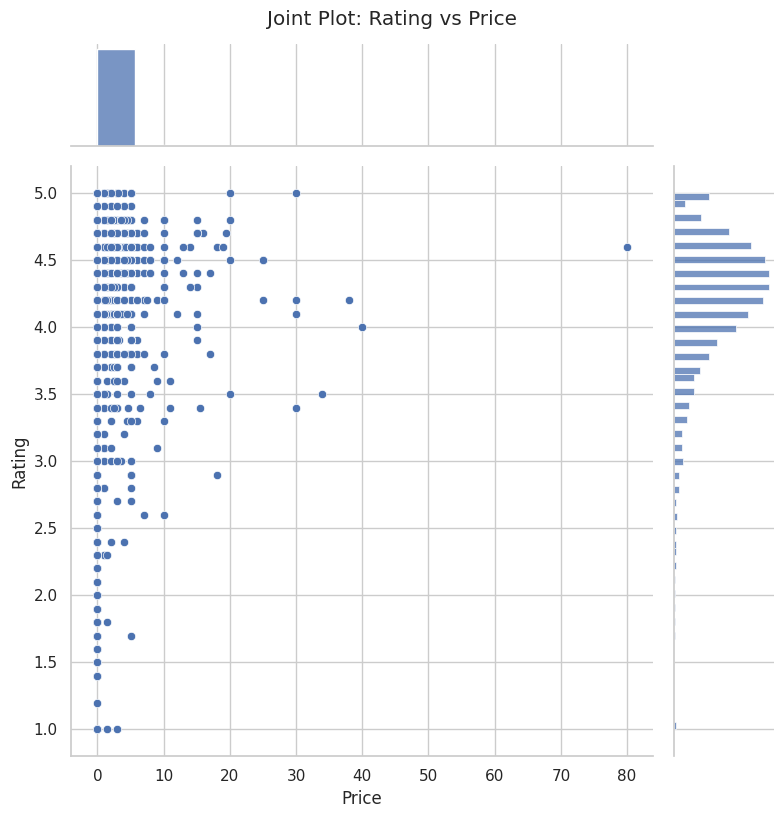

In [ ]:
plt.figure(figsize=(10, 8))

sns.jointplot(x='Price', y='Rating', data=df, kind='scatter', height=8)
plt.suptitle('Joint Plot: Rating vs Price', y=1.02)
plt.show()

In [ ]:
# Rating does increase with price.

**Make scatter plot/joinplot for Rating vs. Size**
- Are heavier apps rated better?

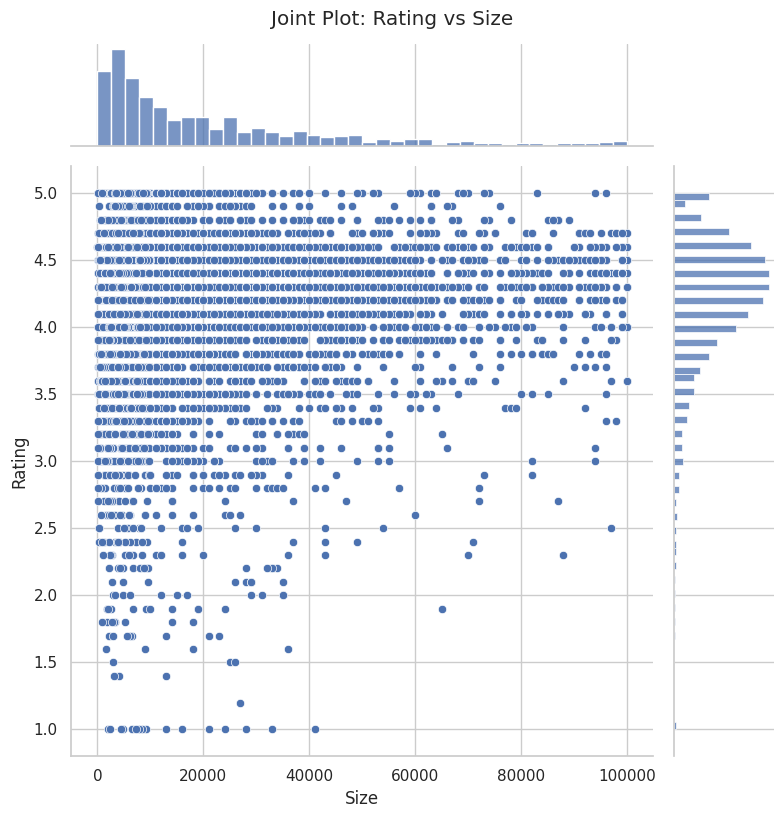

In [ ]:
sns.jointplot(x='Size', y='Rating', data=df, kind='scatter', height=8)
plt.suptitle('Joint Plot: Rating vs Size', y=1.02)
plt.show()

In [ ]:
# Heavy apps have better rating

**Make scatter plot/joinplot for Rating vs. Reviews**
- Does more review mean a better rating always?

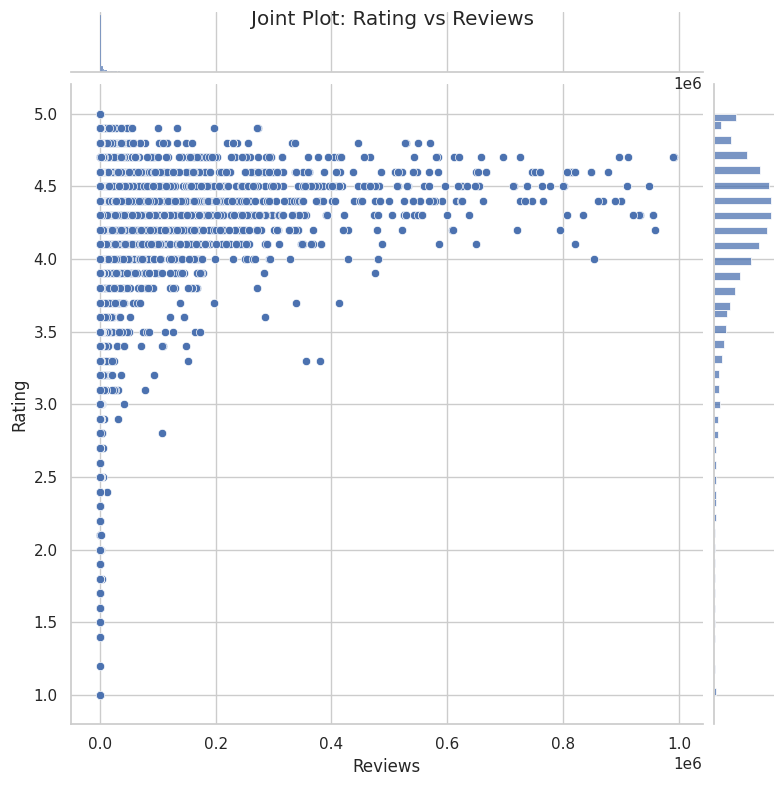

In [ ]:
sns.jointplot(x='Reviews', y='Rating', data=df, kind='scatter', height=8, ratio=9)
plt.suptitle('Joint Plot: Rating vs Reviews')
plt.show()

In [ ]:
# More review means a better rating

**Make boxplot for Rating vs. Content Rating**
- Is there any difference in the ratings? Are some types liked better?

<ipython-input-423-7d0ebd61cc15>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Content Rating', data=df, palette='viridis', showfliers=False)


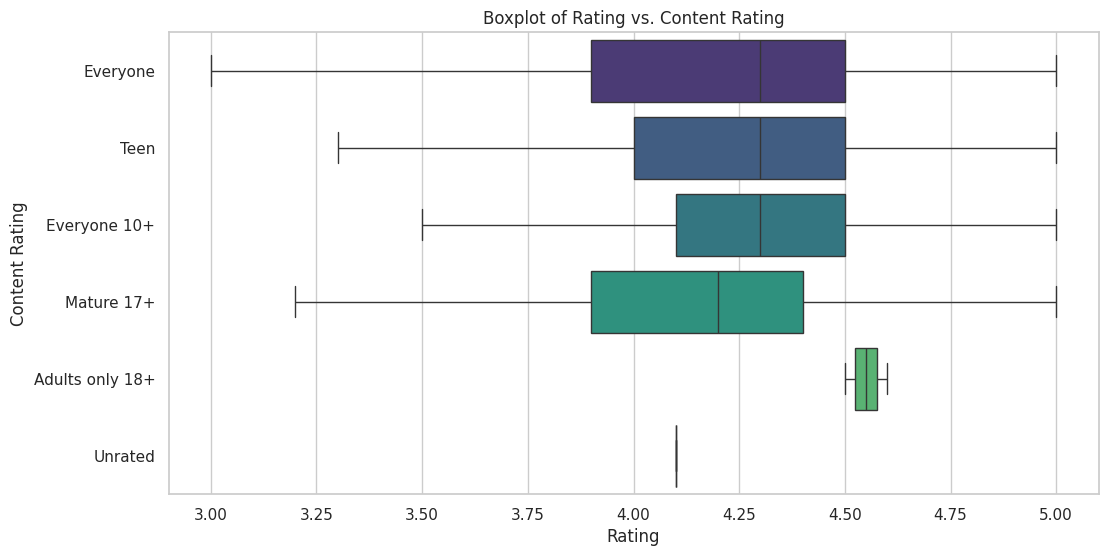

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating', y='Content Rating', data=df, palette='viridis', showfliers=False)

plt.xlabel('Rating')
plt.ylabel('Content Rating')
plt.title('Boxplot of Rating vs. Content Rating')

plt.show()

In [ ]:
# Yes 18+ are liked better.

**Make boxplot for Ratings vs. Category**
- Which genre has the best ratings?

<ipython-input-425-52fce5c140fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Category', data=df, palette='viridis')


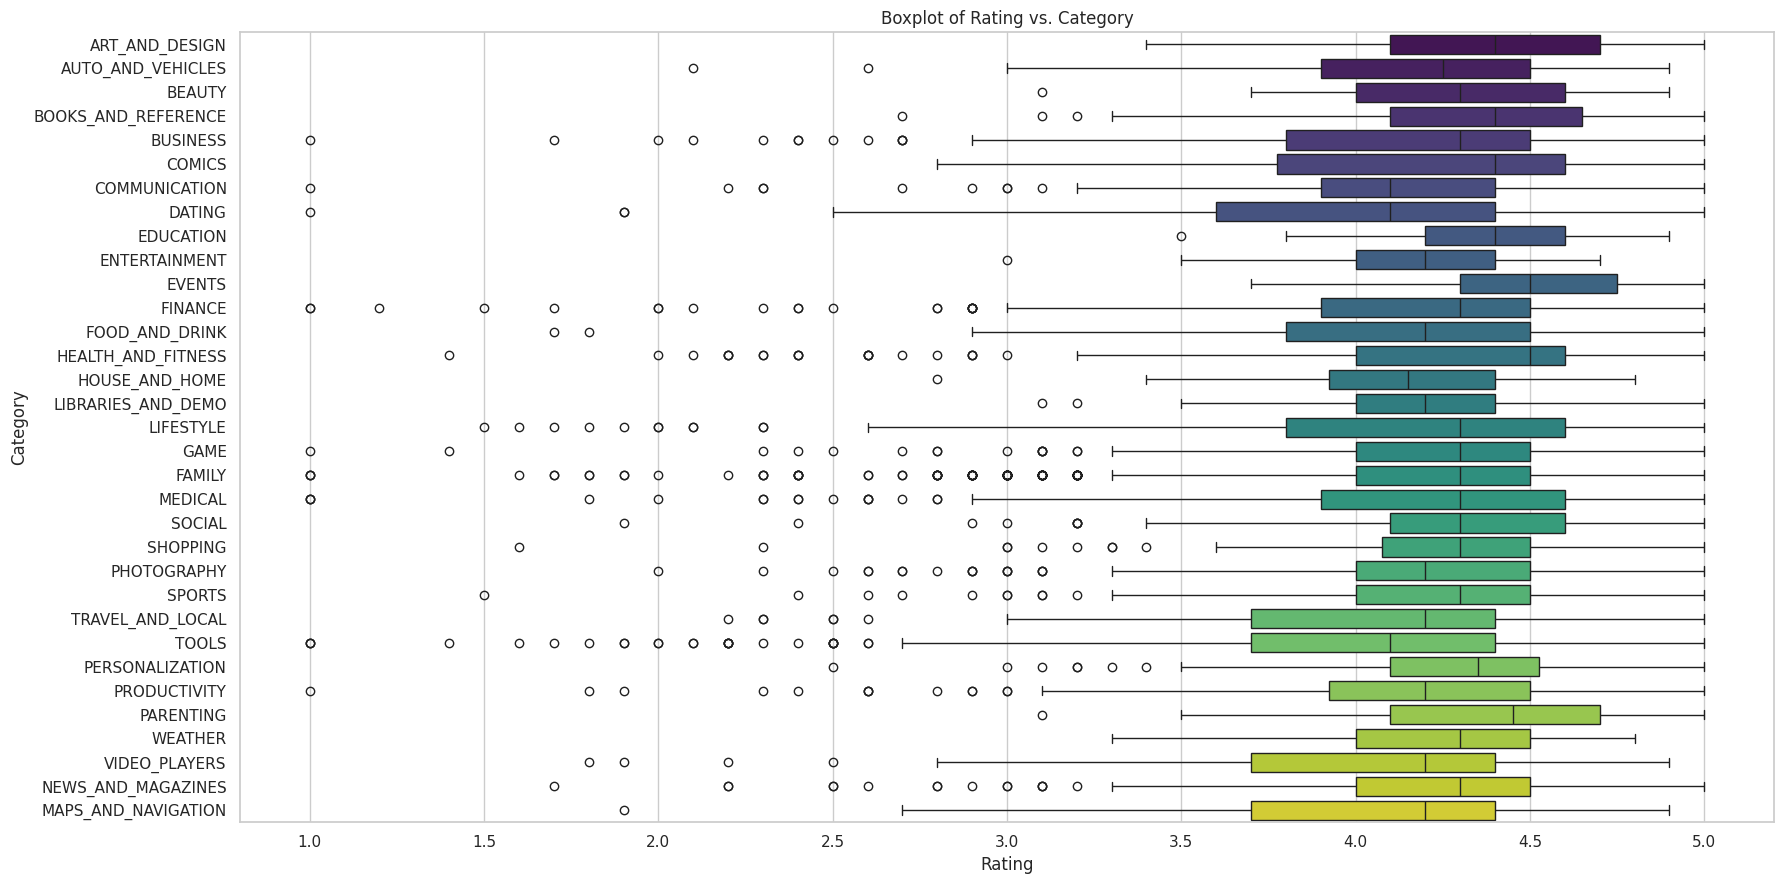

In [ ]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='Rating', y='Category', data=df, palette='viridis')

plt.xlabel('Rating')
plt.ylabel('Category')
plt.title('Boxplot of Rating vs. Category')

plt.tight_layout()
plt.show()

In [ ]:
# Entertainment has the best rating

# **8. Data preprocessing**
- For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [ ]:
df.to_csv('inp1.csv', index=False)
print("\nDisplay Data Frame Info:")
print(df.info())


Display Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6921 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6921 non-null   object 
 1   Category        6921 non-null   object 
 2   Rating          6921 non-null   float64
 3   Reviews         6921 non-null   int64  
 4   Size            6921 non-null   object 
 5   Installs        6921 non-null   int64  
 6   Type            6921 non-null   int64  
 7   Price           6921 non-null   float64
 8   Content Rating  6921 non-null   object 
 9   Genres          6921 non-null   object 
 10  Last Updated    6921 non-null   object 
 11  Current Ver     6921 non-null   object 
 12  Android Ver     6921 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 757.0+ KB
None


**- Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.**

In [ ]:
df['Reviews'] = np.log1p(df['Reviews'])
df['Installs'] = np.log1p(df['Installs'])

In [ ]:
print("Updated DF Info:")
print(df.info())

Updated DF Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6921 entries, 0 to 7336
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6921 non-null   object 
 1   Category        6921 non-null   object 
 2   Rating          6921 non-null   float64
 3   Reviews         6921 non-null   float64
 4   Size            6921 non-null   object 
 5   Installs        6921 non-null   float64
 6   Type            6921 non-null   int64  
 7   Price           6921 non-null   float64
 8   Content Rating  6921 non-null   object 
 9   Genres          6921 non-null   object 
 10  Last Updated    6921 non-null   object 
 11  Current Ver     6921 non-null   object 
 12  Android Ver     6921 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 757.0+ KB
None


**- Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.**

In [ ]:
df = df.drop('App', axis=1)
df = df.drop('Last Updated', axis=1)
df = df.drop('Current Ver', axis=1)
df = df.drop('Android Ver', axis=1)

In [ ]:
print("Info after dropping columns:")
print(df.info())

Info after dropping columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6921 entries, 0 to 7336
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        6921 non-null   object 
 1   Rating          6921 non-null   float64
 2   Reviews         6921 non-null   float64
 3   Size            6921 non-null   object 
 4   Installs        6921 non-null   float64
 5   Type            6921 non-null   int64  
 6   Price           6921 non-null   float64
 7   Content Rating  6921 non-null   object 
 8   Genres          6921 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 540.7+ KB
None


**- Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.**

In [ ]:
# List of columns to create dummy columns for
columns_to_dummy = ['Category', 'Genres', 'Content Rating']

# Create dummy columns
df_dummies = pd.get_dummies(df[columns_to_dummy])

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original columns for which dummy columns were created
df.drop(columns=columns_to_dummy, inplace=True)

# Display the updated DataFrame
print(df.head())
print("Info after creating dummy column:")
print(df.info())

   Rating    Reviews     Size   Installs  Type  Price  \
0     4.1   5.075174  19000.0   9.210440     0    0.0   
1     3.9   6.875232  14000.0  13.122365     0    0.0   
2     4.7  11.379520   8700.0  15.424949     0    0.0   
3     4.3   6.875232   2800.0  11.512935     0    0.0   
4     4.4   5.123964   5600.0  10.819798     0    0.0   

   Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0                        1                           0                0   
1                        1                           0                0   
2                        1                           0                0   
3                        1                           0                0   
4                        1                           0                0   

   Category_BOOKS_AND_REFERENCE  ...  \
0                             0  ...   
1                             0  ...   
2                             0  ...   
3                             0  ...   
4     

In [ ]:
print(df.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=157)


In [ ]:
# Convert 'Installs' column to int
df['Installs'] = df['Installs'].astype(int)
# Round 'Reviews' column to 2 decimals
df['Reviews'] = df['Reviews'].round(4)

# Display the updated DataFrame information
print(df.head())

   Rating  Reviews     Size  Installs  Type  Price  Category_ART_AND_DESIGN  \
0     4.1   5.0752  19000.0         9     0    0.0                        1   
1     3.9   6.8752  14000.0        13     0    0.0                        1   
2     4.7  11.3795   8700.0        15     0    0.0                        1   
3     4.3   6.8752   2800.0        11     0    0.0                        1   
4     4.4   5.1240   5600.0        10     0    0.0                        1   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
3                           0                0                             0   
4                           0                0                             0   

   ...  Genres_Video Players & Editors;Creat

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6921 entries, 0 to 7336
Columns: 157 entries, Rating to Content Rating_Unrated
dtypes: float64(3), int64(2), object(1), uint8(151)
memory usage: 1.4+ MB
None


In [ ]:
df.to_csv('inp2.csv', index=False)

# **9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.**

In [ ]:
from sklearn.model_selection import train_test_split

# Target variable (y)
y = df['Rating']

# Train-test split (70-30 ratio)
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# **10. Separate the dataframes into X_train, y_train, X_test, and y_test.**

In [ ]:
# Features (X) and target variables (y)
X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']

X_test = df_test.drop('Rating', axis=1)
y_test = df_test['Rating']

# Resulting DataFrames
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of df_train: (4844, 157)
Shape of df_test: (2077, 157)
Shape of X_train: (4844, 156)
Shape of y_train: (4844,)
Shape of X_test: (2077, 156)
Shape of y_test: (2077,)


# **11 . Model building**

- Use linear regression as the technique
- Report the R2 on the train set

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

# **12. Make predictions on test set and report R2.**

In [ ]:
# Predict the target variable on the test set
y_test_pred = model.predict(X_test)

# Calculate R2 score on the test set
r2_test = r2_score(y_test, y_test_pred)

# Print the R2 score on the test set
print("R2 Score on Test Set:", r2_test)

R2 Score on Test Set: 0.1309534673797338


# ***R2 Score on Test Set: 0.1309534673797338***

**Checking Actual vs predicted values**

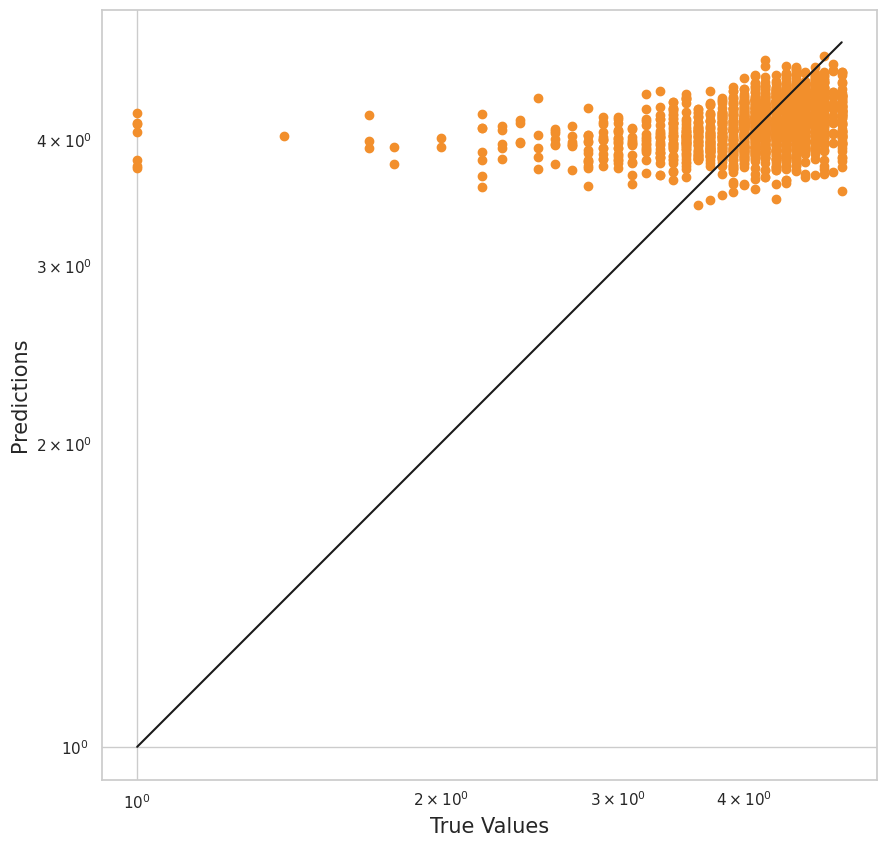

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_test_pred, c='#F28F2C')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()